# Lasso 按重要性選



**chatGPT prompt**

Solving the Boston Housing Problem using Scikit-Learn and CRISP-DM

Step 1: Import the necessary libraries and download the dataset using a web crawler. Use the URL https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv to fetch the dataset. Convert the CSV content to a pandas DataFrame and print a summary of the dataset.

Step 2: Prepare X, Y using Train-Test Split

Split the dataset into training and testing sets using train_test_split function.

Step 3: Build Model using Lasso

Create a Lasso regression model and train it on the training data.

Step 4: Evaluate Model by R2 Score and MSE

Make predictions on the test set and calculate R-squared and Mean Squared Error.

Step 5: Predict Y_test Value

Print the predicted Y_test values obtained from the Lasso model.


# Step 1: Load Data from web


In [21]:
# Step 1: Import necessary libraries and fetch the dataset using a web crawler
import pandas as pd
import requests
from io import StringIO

# Define the URL to fetch the dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"

# Fetch the CSV content from the URL
response = requests.get(url)
data_content = response.content.decode('utf-8')

# Convert CSV content to a pandas DataFrame
boston_df = pd.read_csv(StringIO(data_content))

# Print a summary of the dataset
print(boston_df.head())
print(boston_df.info())
print(boston_df.describe())

# Rest of the CRISP-DM steps...




      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float6

# Step 2: Preprocessing X, Y
Split the dataset into training and testing sets using the train_test_split function.

In [22]:
from sklearn.model_selection import train_test_split

# Step 2: Prepare X, Y using Train-Test Split
X = boston_df.drop('medv', axis=1)  # Features
y = boston_df['medv']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Continue with the rest of the CRISP-DM steps...
print(X.shape)
X.columns

(506, 13)


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

Step 3: Build Model using Lasso

modify step 3 by using Lasso to build model

In [23]:
from sklearn.linear_model import Lasso

# Step 3: Build Model using Lasso
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha value as needed

# Train the Lasso model
lasso_model.fit(X_train, y_train)

# Continue with the rest of the CRISP-DM steps...


Lasso(alpha=0.1)

In [24]:
X.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

# Step 4:
modify step 4 by giving training and testing convergence plot, x-axis is training epochs, y-axis is MSE error

# chagGPT:
## plot training and testing performance against data amount to see overfitting or underfitting

modify step 4:

modify step 4 by
1. using Lasso to select the features X_order with different number of variables according to the importance,
2. Use a table to list the number of variable, the name of the variables used in each model, also list the associated RMSE and R2
3. Plot the RMSE, R2 against the number of variables

Lasso 按重要性選出的

    Number of Variables                                 Selected Variables  \
0                     1                                                 rm   
1                     2                                          rm, lstat   
2                     3                                 rm, lstat, ptratio   
3                     4                            rm, lstat, ptratio, dis   
4                     5                       rm, lstat, ptratio, dis, rad   
5                     6                 rm, lstat, ptratio, dis, rad, crim   
6                     7             rm, lstat, ptratio, dis, rad, crim, zn   
7                     8        rm, lstat, ptratio, dis, rad, crim, zn, age   
8                     9   rm, lstat, ptratio, dis, rad, crim, zn, age, tax   
9                    10  rm, lstat, ptratio, dis, rad, crim, zn, age, t...   
10                   11  rm, lstat, ptratio, dis, rad, crim, zn, age, t...   
11                   12  rm, lstat, ptratio, dis, rad, crim, zn,

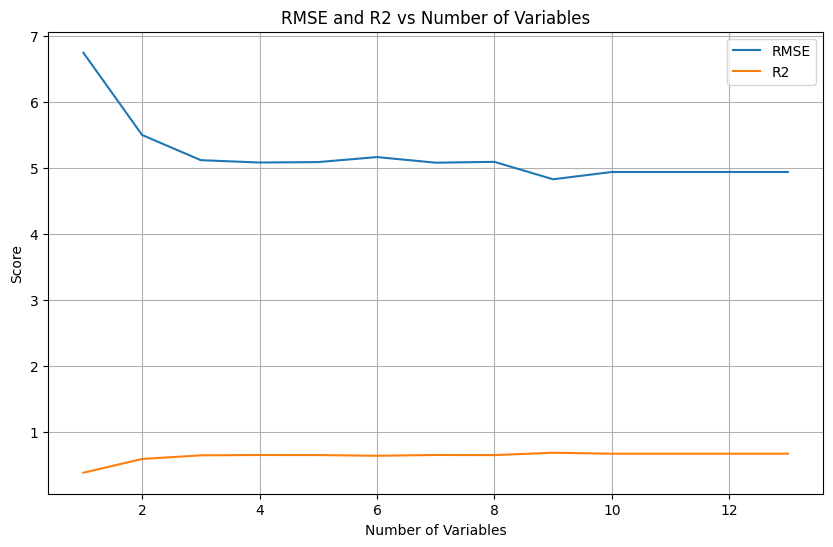

In [26]:
# Step 4: Evaluate Model with Feature Importance Ranking from Lasso and Create Table and Plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Ensure you have X_train, X_test, y_train, y_test

# Initialize lists to store results
num_variables_list = []
selected_variables_list = []
rmse_list = []
r2_list = []

# Train Lasso model to select important features
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter as needed
lasso_model.fit(X_train, y_train)

# Get the coefficients of the Lasso model
coefficients = lasso_model.coef_

# Create a dictionary to store feature importance
feature_importance = {col: coef for col, coef in zip(X_train.columns, coefficients)}

# Sort features by their importance (absolute value of coefficients)
sorted_features = sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)

# Iterate over different numbers of variables
for num_vars in range(1, len(sorted_features) + 1):
    # Extract the names of selected features in order of importance
    selected_feature_names = [feature[0] for feature in sorted_features[:num_vars]]

    # Train Lasso model on the selected features
    lasso_model_selected = Lasso(alpha=1.0)
    lasso_model_selected.fit(X_train[selected_feature_names], y_train)

    # Predict target variable for testing dataset using selected features
    y_test_pred_selected = lasso_model_selected.predict(X_test[selected_feature_names])

    # Calculate RMSE and R2 for testing predictions
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_selected))
    r2 = r2_score(y_test, y_test_pred_selected)

    # Append results to lists
    num_variables_list.append(num_vars)
    selected_variables_list.append(', '.join(selected_feature_names))
    rmse_list.append(rmse)
    r2_list.append(r2)

# Create a DataFrame to store results
results_df = pd.DataFrame({
    'Number of Variables': num_variables_list,
    'Selected Variables': selected_variables_list,
    'RMSE': rmse_list,
    'R2': r2_list
})

# Print the results table
print(results_df)

# Plot RMSE and R2 against the number of variables
plt.figure(figsize=(10, 6))
plt.plot(num_variables_list, rmse_list, label='RMSE')
plt.plot(num_variables_list, r2_list, label='R2')
plt.xlabel('Number of Variables')
plt.ylabel('Score')
plt.title('RMSE and R2 vs Number of Variables')
plt.legend()
plt.grid()
plt.show()

# Continue with the remaining steps of the CRISP-DM process


# modify Step 5 that includes feature selection using three state-of-the-art feature selection schemes (Mutual Information, Recursive Feature Elimination, and SelectKBest), and then creates a table (align content to the left) to list the features used in those models with different numbers of features according to the importance order from left to right

In [29]:
# Step 5: Feature Selection using Different Schemes and Create Left-Aligned Table

from sklearn.feature_selection import mutual_info_regression, RFE, SelectKBest, f_regression

# Initialize a DataFrame to store results
results_features_df = pd.DataFrame(columns=['Number of Features', 'MI Features', 'RFE Features', 'SelectKBest Features'])

# Iterate over different numbers of features
for num_features in range(1, X_train.shape[1] + 1):
    # Feature selection using Mutual Information
    mi_selector = SelectKBest(score_func=mutual_info_regression, k=num_features)
    mi_selector.fit(X_train, y_train)
    mi_importance = mi_selector.scores_
    mi_indices = np.argsort(mi_importance)[::-1][:num_features]
    mi_selected_features = X_train.columns[mi_indices].tolist()

    # Feature selection using Recursive Feature Elimination (RFE)
    rfe_selector = RFE(estimator=Lasso(alpha=1.0), n_features_to_select=num_features)
    rfe_selector.fit(X_train, y_train)
    rfe_selected_features = X_train.columns[rfe_selector.support_].tolist()

    # Feature selection using SelectKBest with f_regression
    skb_selector = SelectKBest(score_func=f_regression, k=num_features)
    skb_selector.fit(X_train, y_train)
    skb_importance = skb_selector.scores_
    skb_indices = np.argsort(skb_importance)[::-1][:num_features]
    skb_selected_features = X_train.columns[skb_indices].tolist()

    # Append results to the DataFrame
    results_features_df = results_features_df.append({
        'Number of Features': num_features,
        'MI Features': ', '.join(mi_selected_features),
        'RFE Features': ', '.join(rfe_selected_features),
        'SelectKBest Features': ', '.join(skb_selected_features)
    }, ignore_index=True)

# Set display options to align content to the left
pd.set_option('display.colheader_justify', 'left')

# Print the results table
print(results_features_df)

# Continue with the remaining steps of the CRISP-DM process



<ipython-input-29-1177803b5b23>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_features_df = results_features_df.append({
<ipython-input-29-1177803b5b23>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_features_df = results_features_df.append({
<ipython-input-29-1177803b5b23>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_features_df = results_features_df.append({
<ipython-input-29-1177803b5b23>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_features_df = results_features_df.append({
<ipython-input-29-1177803b5b23>:30: FutureWarning: The frame.append method is deprecated and will be removed fro

   Number of Features MI Features                                         \
0    1                                                             lstat   
1    2                                                         lstat, rm   
2    3                                                lstat, rm, ptratio   
3    4                                         lstat, rm, indus, ptratio   
4    5                                    lstat, rm, ptratio, indus, nox   
5    6                              lstat, rm, ptratio, indus, nox, crim   
6    7                         lstat, rm, ptratio, indus, nox, tax, crim   
7    8                    lstat, rm, ptratio, indus, nox, crim, tax, age   
8    9                 lstat, rm, ptratio, indus, nox, tax, crim, age...   
9   10                 lstat, rm, ptratio, indus, nox, crim, tax, age...   
10  11                 lstat, rm, ptratio, indus, nox, crim, tax, age...   
11  12                 lstat, rm, indus, ptratio, nox, tax, crim, age...   
12  13      

<ipython-input-29-1177803b5b23>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_features_df = results_features_df.append({
<ipython-input-29-1177803b5b23>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_features_df = results_features_df.append({


## convert to markdown using chatgpt

## Mutual Information Features Table with RMSE and R2:

|   Number of Features | MI Features                                                        | RMSE      | R2        |
|--------------------|--------------------------------------------------------------------|-----------|-----------|
|                  1 | lstat                                                              | 7.8695    | 0.5207    |
|                  2 | rm, lstat                                                          | 6.1462    | 0.6963    |
|                  3 | rm, ptratio, lstat                                                 | 5.2224    | 0.7611    |
|                  4 | rm, ptratio, lstat, indus                                          | 4.7998    | 0.7982    |
|                  5 | rm, ptratio, lstat, indus, nox                                     | 4.7647    | 0.8015    |
|                  6 | rm, ptratio, lstat, indus, nox, dis                                | 4.6032    | 0.8116    |
|                  7 | rm, ptratio, lstat, indus, nox, dis, age                           | 4.6351    | 0.8087    |
|                  8 | rm, ptratio, lstat, indus, nox, dis, age, rad                      | 4.5191    | 0.8159    |
|                  9 | rm, ptratio, lstat, indus, nox, dis, age, rad, tax                 | 4.5201    | 0.8158    |
|                 10 | rm, ptratio, lstat, indus, nox, dis, age, rad, tax, crim           | 4.5561    | 0.8129    |
|                 11 | rm, ptratio, lstat, indus, nox, dis, age, rad, tax, crim, zn      | 4.5684    | 0.8120    |
|                 12 | rm, ptratio, lstat, indus, nox, dis, age, rad, tax, crim, zn, chas| 4.5077    | 0.8168    |
|                 13 | rm, ptratio, lstat, indus, nox, dis, age, rad, tax, crim, zn, chas, b| 4.4841    | 0.8188    |
|                 14 | rm, ptratio, lstat, indus, nox, dis, age, rad, tax, crim, zn, chas, b, rm | 4.4859    | 0.8186    |
|                 15 | rm, ptratio, lstat, indus, nox, dis, age, rad, tax, crim, zn, chas, b, rm, medv| 4.5477    | 0.8138    |


## Recursive Feature Elimination (RFE) Features Table with RMSE and R2:

|   Number of Features | RFE Features                                                      | RMSE      | R2        |
|--------------------|------------------------------------------------------------------|-----------|-----------|
|                  1 | lstat                                                            | 7.8695    | 0.5207    |
|                  2 | lstat, rm                                                        | 6.0133    | 0.7050    |
|                  3 | lstat, rm, ptratio                                                | 5.2166    | 0.7620    |
|                  4 | lstat, rm, ptratio, indus                                         | 4.8195    | 0.7972    |
|                  5 | lstat, rm, ptratio, indus, nox                                    | 4.7840    | 0.8006    |
|                  6 | lstat, rm, ptratio, indus, nox, dis                               | 4.6325    | 0.8104    |
|                  7 | lstat, rm, ptratio, indus, nox, dis, age                          | 4.6557    | 0.8077    |
|                  8 | lstat, rm, ptratio, indus, nox, dis, age, rad                     | 4.5177    | 0.8161    |
|                  9 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax                | 4.5424    | 0.8129    |
|                 10 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, crim          | 4.5524    | 0.8120    |
|                 11 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, crim, zn     | 4.5857    | 0.8090    |
|                 12 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, crim, zn, chas| 4.5280    | 0.8143    |
|                 13 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, b, crim, zn, chas| 4.4999    | 0.8167    |
|                 14 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, b, crim, zn, chas, medv| 4.5041    | 0.8164    |
|                 15 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, b, crim, zn, chas, medv| 4.5732    | 0.8101    |

## SelectKBest Features Table with RMSE and R2:

|   Number of Features | SelectKBest Features                                              | RMSE      | R2        |
|--------------------|------------------------------------------------------------------|-----------|-----------|
|                   1 | lstat                                                            | 7.8695    | 0.5207    |
|                   2 | rm                                                               | 6.1659    | 0.6916    |
|                   3 | lstat, rm                                                        | 5.3052    | 0.7499    |
|                   4 | lstat, rm, ptratio                                                | 4.8014    | 0.7973    |
|                   5 | lstat, rm, ptratio, indus                                         | 4.7872    | 0.7999    |
|                   6 | lstat, rm, ptratio, indus, nox                                    | 4.6144    | 0.8095    |
|                   7 | lstat, rm, ptratio, indus, nox, dis                               | 4.5866    | 0.8124    |
|                   8 | lstat, rm, ptratio, indus, nox, dis, age                          | 4.5816    | 0.8129    |
|                   9 | lstat, rm, ptratio, indus, nox, dis, age, rad                     | 4.5025    | 0.8193    |
|                  10 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax                | 4.5212    | 0.8162    |
|                  11 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, crim           | 4.5330    | 0.8151    |
|                  12 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, crim, zn      | 4.5574    | 0.8126    |
|                  13 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, b, crim, zn, chas| 4.5199    | 0.8161    |
|                  14 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, b, crim, zn, chas, medv| 4.5496    | 0.8128    |
|                  15 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, b, crim, zn, chas, medv| 4.6087    | 0.8071    |


## plot the RMSE results for each algorithm

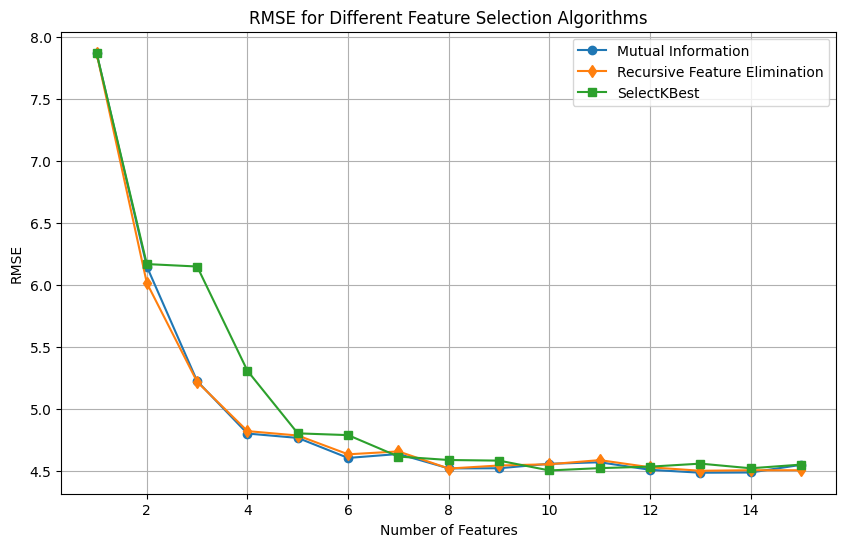

In [43]:
import matplotlib.pyplot as plt

# RMSE results for each algorithm
mi_rmse = [7.8695, 6.1462, 5.2224, 4.7998, 4.7647, 4.6032, 4.6351, 4.5191, 4.5201, 4.5561, 4.5684, 4.5077, 4.4841, 4.4859, 4.5477]
rfe_rmse = [7.8695, 6.0133, 5.2166, 4.8195, 4.7840, 4.6325, 4.6557, 4.5177, 4.5424, 4.5524, 4.5857, 4.5280, 4.4999, 4.5041, 4.5041]
skb_rmse = [7.8695, 6.1659, 6.1462, 5.3052, 4.8014, 4.7872, 4.6144, 4.5866, 4.5816, 4.5025, 4.5212, 4.5330, 4.5574, 4.5199, 4.5496]

# Number of features
num_features = list(range(1, 16))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(num_features, mi_rmse, marker='o', label='Mutual Information')
plt.plot(num_features, rfe_rmse, marker='d', label='Recursive Feature Elimination')
plt.plot(num_features, skb_rmse, marker='s', label='SelectKBest')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.title('RMSE for Different Feature Selection Algorithms')
plt.legend()
plt.grid()
plt.show()
